In [7]:
# *** IMPORTED PACKAGES ***
##Python 3
import numpy as np
import matplotlib.pyplot as plt
import array
import random
import pandas as pd
import itertools
import operator


In [8]:
2+2

4

In [9]:
##Generate NK Landscape
N = 3 
K = 0 
NK_land = np.random.rand(N, 2**(K+1))

In [344]:
# Generate a random position on Landscape
##INPUTS
#N - N 
def Position_rand(N):
    Pos = (np.random.rand(N)>0.5)
    Pos = Pos.astype(int)
    #Position = np.repeat(Pos,N)
    #Position = np.full((N, N), Pos, dtype=int)
    #return(Position[1])
    return(Pos)

In [11]:
##get Fitness
#This function gets the fitness averaged across the N variables for a given interaction position on a Landscape
###Inputs:
###Landscape - Landscape Values
###Position - Your Current Position / vector of Interactions
###Output  - Average fitness
def get_fitness(Landscape,Position):
    N=len(Landscape)
    totalFitness = 0
    #Loop through all N
    for currIndex in np.arange(N):
        #get the fitness indices from each k based upon local gene values
        localgenes = Position[currIndex:currIndex+K+1]
        #loop through to next if were are near the nth index
        if currIndex+K+1 > N:
            localgenes = np.append(localgenes,Position[ 0:currIndex-(N-K)+1])
        #get index fitness  is stored at
        interactIndex = ((2**(np.arange(K+1)*(localgenes)))*localgenes).sum()
        #update fitness
        totalFitness = totalFitness + Landscape[currIndex,interactIndex]
    return(totalFitness/N)

In [12]:
#get_fitness(NK_land,[1,0,1])

In [13]:
## Create a Random Walker, that will for randomly walk across the landscape
## Inputs: Steps, initPosition, Landscape
## Steps - Number of steps the walker takes
## initPosition - inital postition of walker
## Landscape - Input of landscape values
### Outputs: FitnessTime
## FitnessHistory - Fitness recorded over time of the random walker

def random_walker(Steps, initPosition, Landscape):
    #Get N
    N=len(Landscape)

    #Set current position
    currPosition = initPosition
    
    #Get first fitness value
    FitnessHistory=get_fitness(Landscape,currPosition)

        #Take a step by picking a random gene to change
        toChange = random.randint(0,N-1)
        #this changes 0 to 1 and 1 to zero
        currPosition[toChange] = abs(currPosition[toChange]-1)
        #Append to fitness data
        FitnessHistory =  np.append(FitnessHistory,get_fitness(Landscape,currPosition))

    return(FitnessHistory)


Plot the random walker to illustrate landscape fitness variation

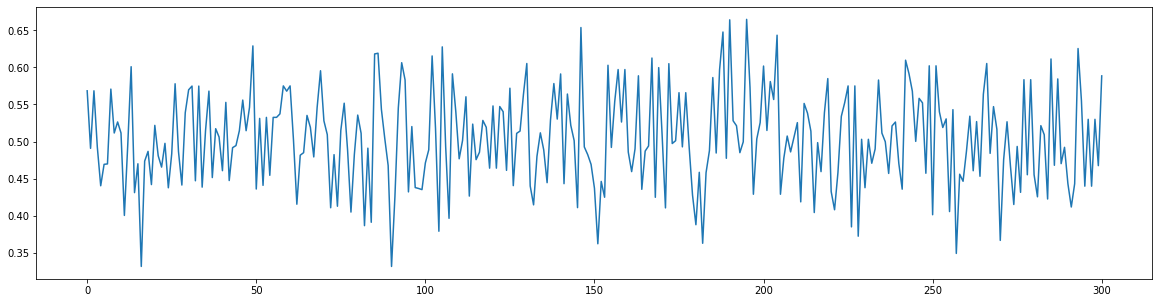

In [14]:
N = 20
K = 19

NK_land = np.random.rand(N, 2**(K+1))
iPosition = Position_rand(N)
numSteps=300
FitnessPath = random_walker(numSteps,initPosition = iPosition,Landscape = NK_land)

##plot the data
plt.figure(figsize=(20,5))
plt.plot(FitnessPath)
plt.show()

In [15]:
## Now its time to play with creating various Landscapes

## Now we wish to alter the landscape a bit.
Fundamentally it seems we may do two different things.
1. We may alter intra-gene fitness correlation, that is a changing gene 2 won't change the fitness contribution of it to gene 1 much
2. We may alter cross-gene fitness correlation, that is changing gene 2 alters the aggregate fitness contribution of gene 1 and gene 2 in similar ways.

However we wish for the least cludgy/simplest code possible/simplest model. (Noting that an NK model could be built in as little as one line of code!)

eg if k=2 gene 1's contribution fitness depends upon three genes. There are 2^3 combinations:
[0,0,0]
[0,0,1]
[0,1,0]
[1,0,0]
[0,1,1]
[1,0,1]
[1,1,0]
[1,1,1]

The (Manhattan) distance between any two of these ranges from 1 (e.g. [1,1,1] to [0,1,1]) to 3 (E.g. [0,1,0] to [1,0,1)





A way to induce correlation along intra-gene contributions would be ensure that fitness is correlated with Manhattan Distance)

We could do this (here where k=2) by specifying draw from some distribution for each underlying gene and then say multiplying or adding the contributions.

Perhaps we could try multiplying draws from a production distribution of uniform random variables $X$ ~ $U$

Multiplying may be better as $Var(X_1*X_2*...X_n) = \Pi_{1}^n (\sigma_i^2 +\mu_i^2)-\Pi_1^N\mu_i^2$



### Strategy
1. Generate fitness contributions (per gene) drawn from U[0.5,1.5] for each of the K twice (a value for 0 and a value for 1)

2. This implies the generation of an N * 2(K+1) matrix. As we must access for each of the N genes any possible activations of the relevant gene and K local gene. (This also is a nice model in that whereas the traditional NK model generated a an N by 2^(K+1) matrix, ours is much smaller as only N by 2(K+1) - but with the computational cost realized at accessing the values as multiplication is applied).




In [16]:
##get Fitness for our New Type of NK Landscape
#This function gets the fitness averaged across the N variables for a given interaction position on our new Landscape
###Inputs:
###Landscape - Landscape Values
###Position - Your Current Position / vector of Interactions
###Output  - Average fitness
def get_fitness_Product_World(Landscape, Position):
    N=len(Landscape)
    K=int(len(Landscape[0])/2-1)
    totalFitness = 0
    IndexLocations=Position+2*np.array(range(len(Position)))
    #get columns to access
    Cols = Position+2*np.array(range(len(Position)))
    for NIndex in np.arange(N):
        #get the relevant local gene values that are relevant for each N in the proper order
        localGenes = Position[NIndex:NIndex+K+1]
        if NIndex+K+1 > N: # go to beginning of vector for last N
            localGenes = np.append(localGenes,Position[ 0:NIndex-(N-K)+1])
            
        #get index locations based upon local genes
        IndexLocations=localGenes+2*np.array(range(len(localGenes)))
        #get locally stored values
        LocalValues = NK_World[NIndex,IndexLocations]
        #get fitness contribution of gene by multiplying
        LocalFitness = np.prod(LocalValues)
        #update total fitness
        totalFitness = totalFitness + LocalFitness

    return(totalFitness/N)

In [17]:
#test case
N=10
K=8
NK_World = np.random.rand(N, 2*(K+1))*2 #multiply by two so it is uniform [0,2]
NK_World
get_fitness_Product_World(NK_World,[1,0,1,1,0,0,0,0,0,1])

0.7407270088204942

In [18]:
###now repeat above graphical analysis

In [19]:
## Create a Random Walker, that will for randomly walk across the landscape in our modified NK-Landscape
## Inputs: Steps, initPosition, Landscape
## Steps - Number of steps the walker takes
## initPosition - inital postition of walker
## Landscape - Input of landscape values
### Outputs: FitnessTime
## FitnessHistory - Fitness recorded over time of the random walker

def random_walker_newNK(Steps, initPosition, Landscape):
    #Get N
    N=len(Landscape)
    
    #Set current position
    currPosition = initPosition
    
    #Get first fitness value
    FitnessHistory=get_fitness_Product_World(Landscape,currPosition)

    for s in range(Steps):
        #Take a step by picking a random gene to change
        toChange = random.randint(0,N-1)
        #this changes 0 to 1 and 1 to zero
        currPosition[toChange] = abs(currPosition[toChange]-1)
        #Append to fitness data
        FitnessHistory =  np.append(FitnessHistory,get_fitness_Product_World(Landscape,currPosition))

    return(FitnessHistory)


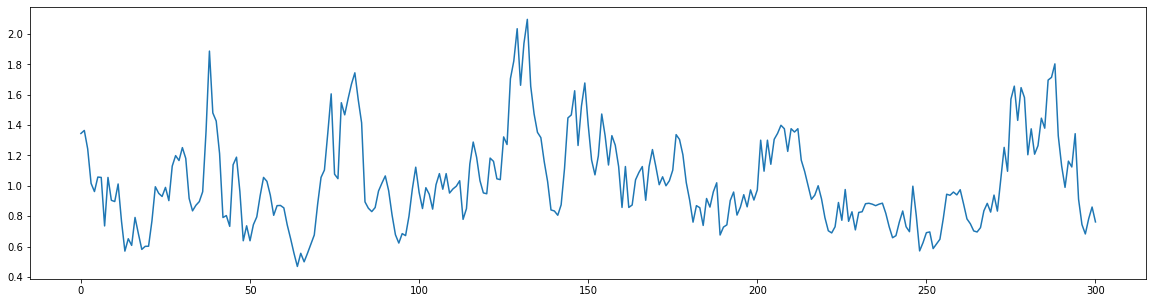

In [20]:
##Plot, may vary N and K
N=20
K=19
NK_World = (0.5+np.random.rand(N, 2*(K+1))) #add by 0.5 so it is uniform[0.5,1.5]

#set initial position
iPosition = Position_rand(N)
#set number of steps
numSteps=300
FitnessPath = random_walker_newNK(numSteps, initPosition = iPosition,Landscape = NK_World)

##plot the data
plt.figure(figsize=(20,5))
plt.plot(FitnessPath)
plt.show()

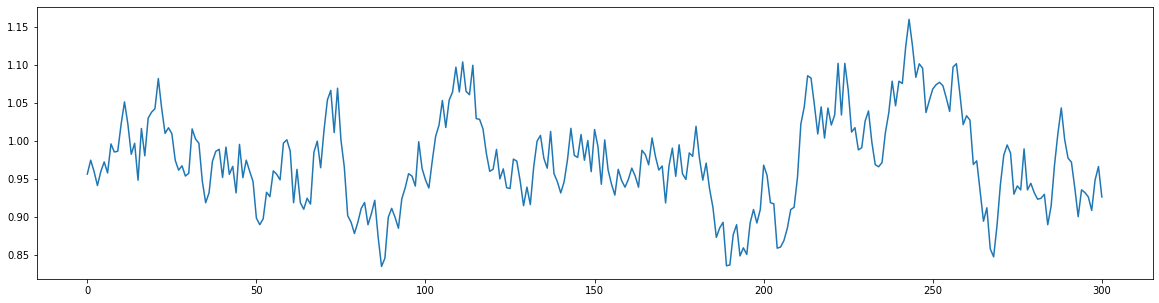

In [21]:
##plot the Orginal NK random walker too
N = 20
K = 1

NK_land = np.random.rand(N, 2**(K+1))+.5
iPosition = Position_rand(N)
numSteps=300
FitnessPath = random_walker(numSteps,initPosition = iPosition,Landscape = NK_land)

##plot the data
plt.figure(figsize=(20,5))
plt.plot(FitnessPath)
plt.show()

## Create Agents on Landscape and Define Behavior
Here I follow Rivkin and create different algorithms
The algorithms attempt to imitate those in Rivkin but for our new model landscape

Later is code that may be used to Replicate Table 7 of Rivkin
Initial results show that Rivkin is not being replicated


In [22]:
##THIS FUNCTION TAKES IN A LIST OF ITems and generates all possible combinations
from itertools import compress, product

def combinations(items):
    return ( list(compress(items,mask)) for mask in product(*[[0,1]]*len(items)) )
    # alternative:       

In [23]:
## Create an algorithm of search so that we select M from N attirbutes to change,
#then stop when we find an improvment


## Inputs: Landscape, iPosition, M
## Landscape - Input of landscape values
## iPosition - inital postition across all variables
## M - M, number of genes to search over
### Outputs:  NewPosition
## NewPosition - The new optimal position found

###NOTE Be vary careful as with high N and M this becomes exponentially longer

def Incremental_Improvement(iPosition, Landscape,M):
    #initialize variables
    ChangedGenes = np.array(iPosition[:])
    N=len(Landscape) # OR N = len(iPosition)
    ##Get current fitness
    CurrentFit = get_fitness_Product_World(Landscape,iPosition)
    #Create list of all permutations of 0,1 of length M
    for j in range(M+1):
            #Get a list of zeros
            if j==0:
                all_combos=np.zeros((1,M),dtype="int8")
            if j>=1:
                #this works, not fully understood by me, but thank god for stackoverflow.
                which = np.array(list(itertools.combinations(range(M), j)))
                #set a grid of zeros
                grid = np.zeros((len(which), M), dtype="int8")
                #change
                grid[np.arange(len(which))[None].T, which] = 1
                #Magic
                all_combos = np.concatenate((all_combos, grid))
                #Now we have a list of all possible permutations of fitness of length M stored in all_combos

    #What remains is to loop over (up to all) combinations of M indices from our N genes 
    #(we can do combinations here since we did permutations before)

    All_indici_combos = list(itertools.combinations(range(N), M))
    ##now loop over the two, getting the fitness of a new  combo
    for indici in All_indici_combos:
        for gene_combo in all_combos:
            ChangedGenes = np.array(iPosition[:])
            ChangedGenes[list(indici)] = gene_combo 
            #See if new fitness greater than old, if so then we are done
            if(get_fitness_Product_World(Landscape,ChangedGenes)) > CurrentFit:
                return(ChangedGenes)
    #if no change than return initial position
    return(iPosition)
    ##GOOD IDEA: Should also return another variable if no change that says it is at a local optima.
    #That way we know not to loop over this long algorithm again.

    ###Note: This code is actually not the quickest possible, but it does work. We could make it more efficient
    #so that duplicates do not occur (I won't though, not worth my time)


In [24]:
##Testing
N=10
Test_Position = Position_rand(N)
K=2
NK_World = (0.5+np.random.rand(N, 2*(K+1))) #add by 0.5 so it is uniform[0.5,1.5]
M=1

Incremental_Improvement(iPosition = Test_Position, Landscape = NK_World, M = 1)

array([0, 0, 0, 0, 0, 1, 0, 0, 1, 1])

In [25]:
## Create an algorithm of imitation to copy J of N attributes of best performer with success probability Theta
#then stop when we find an improvment


## Inputs: iPosition, Landscape, iPosition, J,Theta
## iPosition - inital postition across all variables
## Landscape - Input of landscape values
## bestPosition - Position of Best agent
## J -  number of genes to copy
## Theta -  Probability of Successful copy of each individaul gene/decision

### Outputs:  NewPosition
## NewPosition - The new optimal position found


def follow_the_leader(iPosition, Landscape,bestPosition,J, Theta):
    #check to see if fitness worse
    if (get_fitness_Product_World(Landscape,iPosition) < get_fitness_Product_World(Landscape,bestPosition)):
        bestGenes = bestPosition
        #Randomly select J of the bestPosition Genes
        indices_of_best = np.random.choice(bestPosition.shape[0], J, replace=False)  
        randomGenes = bestPosition[indices_of_best]
        #now for each, replicate poorly with probability theta
        #draw array from U[0,1] of size J
        Probs = np.random.uniform(size=J)
        #Get array determing replicated genes
        Success = Probs<Theta
        #Get replicated genes
        Replicated = abs(randomGenes+(Success-1))
        #Set initial genes to the replicated ones
        iPosition[indices_of_best]=Replicated
        return(iPosition)
    else:
        return(iPosition)


In [26]:
#TESTING
N=20
K=1
NK_World = (0.5+np.random.rand(N, 2*(K+1))) #add by 0.5 so it is uniform[0.5,1.5]
J=20
Theta = .1
Test_Position = Position_rand(N)
Test_Position2 = Position_rand(N)
print(Test_Position)
print(Test_Position2)
print(get_fitness_Product_World(NK_World,Test_Position))
print(get_fitness_Product_World(NK_World,Test_Position2))

follow_the_leader(Test_Position, NK_World,Test_Position2,J,Theta)

[1 0 0 0 1 0 0 1 1 1 1 0 0 0 0 0 0 1 0 0]
[1 1 0 0 1 0 0 0 0 0 1 0 1 0 1 1 1 1 1 0]
0.9559241629461395
0.993072226056943


array([0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0])

In [27]:
## Create an algorithm of hybrid search to first find a local optima a-la "Incremental_Improvement"
#failing to find new optima, then implement "follow_the_leader"


## Inputs: iPosition, Landscape, iPosition, J,Theta
## iPosition - inital postition across all variables
## Landscape - Input of landscape values
## bestPosition - Position of Best agent
## J -  number of genes to copy
## Theta -  Probability of Successful copy of each individaul gene/decision
## M - M, number of genes to search over for incremental Improvement


### Outputs:  NewPosition
## NewPosition - The new optimal position found


def hybrid_climb(iPosition,Landscape,bestPosition,J,Theta,M):
    ##First of all, do an upward hill climb via incremental improvement, but check for potential improvements
    InitialGenes = np.array(iPosition[:])
    NewGenes = Incremental_Improvement(iPosition, Landscape,M)
    #check if change is made, if so then we're done, if not then follow the leader if it makes sense
    if np.array_equal(InitialGenes, NewGenes):

        #check to see if leader has better fitness
        if(get_fitness_Product_World(Landscape,iPosition) < get_fitness_Product_World(Landscape,bestPosition)):
            print("We tried to copy the leader")
            return(follow_the_leader(iPosition, Landscape,bestPosition,J, Theta))
        #if not then you stagnate at your starting position
        else:
            print('We are the leader, and it sucks')
            return(InitialGenes)
    else:
        print("We Climbed the Hill")
        return(NewGenes)
        



In [28]:
## Create an algorithm of hybrid search that replicates rivkin in Table 7


## Inputs: iPosition, Landscape, iPosition, J,Theta
## iPosition - inital postition across all variables
## Landscape - Input of landscape values
## bestPosition - Position of Best agent
## J -  number of genes to copy
## Theta -  Probability of Successful copy of each individaul gene/decision
## M - M, number of genes to search over for incremental Improvement


### Outputs:  NewPosition
## NewPosition - The new optimal position found


def hybrid_climb_continuos(iPosition,Landscape,benchmark_position,J,Theta,M):
    ##First of all, do an upward hill climb via incremental improvement, but check for potential improvements
    InitialGenes = np.array(iPosition[:])

    CurrentPosition = follow_the_leader(InitialGenes, Landscape,benchmark_position,J, Theta)
    currentFitness = get_fitness_Product_World(Landscape,iPosition)
    OldFitness = get_fitness_Product_World(Landscape,CurrentPosition)
    NewGenes = Incremental_Improvement(CurrentPosition, Landscape,M)
    NewFitness = get_fitness_Product_World(Landscape,NewGenes)
    #keep searching until you reach a maxima
    while(NewFitness!=OldFitness):
        #print('Still Searching')
        OldFitness = get_fitness_Product_World(Landscape,NewGenes)
        #print(OldFitness)
        NewGenes = Incremental_Improvement(NewGenes, Landscape,M)
        NewFitness = get_fitness_Product_World(Landscape,NewGenes)
        #print(NewFitness)
        #print(NewFitness)
    return(NewGenes)
    #check if we set a new benchmark, if so return it
    #if(NewFitness>get_fitness_Product_World(Landscape,benchmark_position)):
    #    return(NewGenes)
   # else:
     #   return(benchmark_position)



In [29]:

##Create Data to replicate Rivkin Talbe 7 Panels A and B

N=24
K=11
J=int(N/2)

Theta = .9
M=1
NK_World = (0.5+np.random.rand(N, 2*(K+1))) #add by 0.5 so it is uniform[0.5,1.5]

Landscape=NK_World

##Setup to find maximal fitness voer 100 exploratory searches
Agent_Positions = [Position_rand(N) for _ in range(100)]
FitnessMat = pd.DataFrame([get_fitness_Product_World(Landscape,X) for X in Agent_Positions])
Fitnesses = [get_fitness_Product_World(NK_World,X) for X in Agent_Positions]
bestPositionIndex,value = max(enumerate(Fitnesses), key=operator.itemgetter(1))
#get benchmark
initial_benchmark_position = Agent_Positions[bestPositionIndex]
benchmark_position = initial_benchmark_position
benchmark_fitness = get_fitness_Product_World(NK_World,benchmark_position)
print(benchmark_fitness)

##SEt up counters
CountNewBenchmarks=0
CountReachedBenchmarks=0

##Now loop over 1000 firms
for firm in range(1000):
    init_firm_position = Position_rand(N)
    new_firm_position = hybrid_climb_continuos(init_firm_position,NK_World,benchmark_position,J,Theta,M)
    currentFit=get_fitness_Product_World(NK_World,new_firm_position)
    #print(init_firm_position)
    ##Check if we reach the old benchmark
    if  currentFit == benchmark_fitness:
        #print('Reach Benchmark')
        CountReachedBenchmarks +=1
    #check if new fitness meets benchmark, then reset benchmark
    if  currentFit > benchmark_fitness:
        benchmark_fitness = currentFit
        benchmark_position = new_firm_position
        CountNewBenchmarks+=1
        #print('New Benchmark')
        #print(benchmark_fitness)

    if firm % 100==1:
        print(firm)


print('Finished')
print(CountReachedBenchmarks)
print(CountNewBenchmarks)

1.1104610586671775
1
101
201
301
401
501
601
701
801
901
Finished
540
2


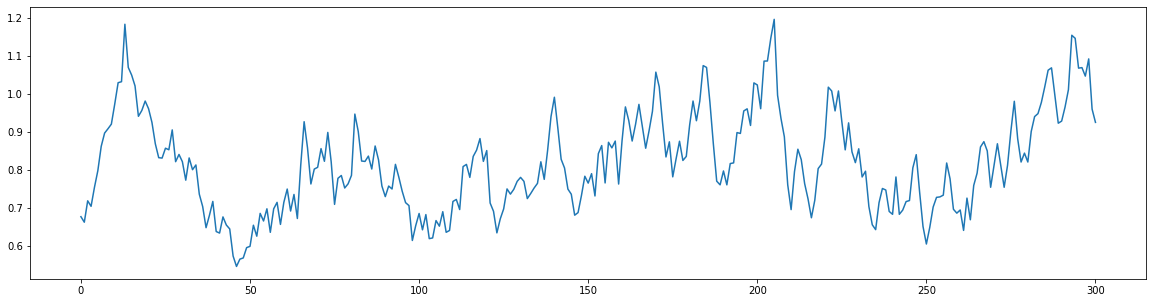

In [30]:
##Check the landscape
#set initial position
iPosition = Position_rand(N)
#set number of steps
numSteps=300
FitnessPath = random_walker_newNK(numSteps, initPosition = iPosition,Landscape = NK_World)

##plot the data
plt.figure(figsize=(20,5))
plt.plot(FitnessPath)
plt.show()

In [3]:
benchmark_fitness

NameError: name 'benchmark_fitness' is not defined

# Other
Below is a simulation of an alternative way which I did not finish and should be ignored for now

In [ ]:
##Simulate
##This Simulates a given number of agents on a landscape over time
#### Inputs
## Inputs: iPosition, Landscape, iPosition, J,Theta
# Num_Agents = Number of Agents to simulate
## iPosition - inital postition across all variables
## Landscape - Input of landscape values
## bestPosition - Position of Best agent
## J -  number of genes to copy
## Theta -  Probability of Successful copy of each individaul gene/decision
## M - M, number of genes to search over for incremental Improvement
## T - time to run simulation

def Simulation_Followers(Num_Agents,Landscape, T, J, Theta, M):
    ##extract landscape values, remember there are (k+1)^2 columns
    N=int(len(Landscape))
    
    #First establish a benchmark strategy
     ##a benchmark strategy was pinpointed as the best of 100 exploratory searches
    Agent_Positions = [Position_rand(N) for _ in range(100)]
    Bench_Positions = [Position_rand(N) for _ in range(Num_Agents)]
    FitnessMat = pd.DataFrame([get_fitness_Product_World(Landscape,X) for X in Agent_Positions])
    Fitnesses = [get_fitness_Product_World(NK_World,X) for X in Agent_Positions]
    bestPositionIndex,value = max(enumerate(Fitnesses), key=operator.itemgetter(1))
    bestPosition = Agent_Positions[bestPositionIndex]
    
    
    ##Reset and redefine agents
    Agent_Positions = [Position_rand(N) for _ in range(Num_Agents)]
    #get intial fitness
    FitnessMat = pd.DataFrame([get_fitness_Product_World(Landscape,X) for X in Agent_Positions])
    Fitnesses = [get_fitness_Product_World(NK_World,X) for X in Agent_Positions]
#see current fitness

    FitnessMat = pd.DataFrame.transpose(FitnessMat)
    #set time:
    t=0
    #iterate over time
    while t<T:          
        Agent_Positions = [follow_the_leader(X, Landscape,bestPosition,J,Theta) for X in Agent_Positions]   
        ##append rows of new fitness
        FitnessMat = FitnessMat.append(pd.Series([get_fitness_Product_World(Landscape,X) for X in Agent_Positions]),
                                       ignore_index=True)
        
        #increase time
        t+=1
        
    return(FitnessMat)

In [ ]:
N=10
K=5
J=5
Theta=.8
M=2
T=1000
NK_World = (0.5+np.random.rand(N, 2*(K+1))) #add by 0.5 so it is uniform[0.5,1.5]
int(len(NK_World))
NumAgents = 100
SimResults = Simulation_Followers(NumAgents,NK_World,T,J,Theta,M)

In [654]:

#Function that changes by a number of given steps
def Change_by_steps(CurrentPosition,NumToChange):
    N=len(CurrentPosition)
    toChange = random.sample(list((range(N))), NumToChange)
                #this changes 0 to 1 and 1 to zero
    CurrentPosition[toChange] = abs(CurrentPosition[toChange]-1)
    return(CurrentPosition)

In [655]:
print(SamplingFrame[0])
Change_by_steps(SamplingFrame[0],1)

[1 0 1 1 1 1 1 0 0 0]


array([1, 0, 1, 1, 1, 1, 1, 0, 1, 0])

In [497]:
####DEfine autocorrelation function
##Inouts:
###Landscape: The Landscape
#Steps: the number of steps to calculate autocorrelation over
def AR_Product_World(Landscape, Steps, Samples):
    #get the Length of the Landscape.
    N=int(len(Landscape))

    
    #Sample many random points on the landscape
    SamplingFrame = [Position_rand(10) for x in range(Samples)]

    #Sample many Steps-difference from these sampled points
    #set an index to zero to keep for allocation purposes and initialize empty arrays for storage
    
    currIndex = 0
    FitMeans=[]
    for row in SamplingFrame:
        OriginalFitness = get_fitness_Product_World(Landscape, row)
        currIndex+=1
        FitnessCorrelation=[] #initalize empty array for storage of values
        for j in range(N*Steps):
            #print(j+1)
            Steppedrow = Change_by_steps(row,1)
            Stepped_Fitness = get_fitness_Product_World(Landscape, Steppedrow)
            #print(OriginalFitness*Stepped_Fitness)
            FitnessCorrelation.append(OriginalFitness*Stepped_Fitness)
        #get average of j samples
        #Store the AutoCorrelation
        #print(FitnessCorrelation)
        AverageFitCoreSoFar=sum(FitnessCorrelation)/len(FitnessCorrelation)
    #Add average to total Correlation then divide 
        FitMeans.append(AverageFitCoreSoFar)
    
    #Average the AutoCorrelation
    MeanAutoCor=sum(FitMeans)/len(FitMeans)
    return(MeanAutoCor)
    
    
    

In [766]:
####DEfine autocorrelation function
##Inouts:
###Landscape: The Landscape
#Steps: the number of steps to calculate autocorrelation over
def AR_NK(Landscape, Steps, Samples):
    #get the Length of the Landscape.
    N=int(len(Landscape))

    
    #Sample many random points on the landscape
    SamplingFrame = [Position_rand(N) for x in range(Samples)]

    #Sample many Steps-difference from these sampled points
    #set an index to zero to keep for allocation purposes and initialize empty arrays for storage
    
    currIndex = 0
    FitMeans=[]
    for k in range(Samples):
        #print(SamplingFrame[k])
        OriginalFitness = get_fitness(Landscape, SamplingFrame[k])
        
        FitnessCorrelation=[] #initalize empty array for storage of values
        for j in range(N*Steps):
            #print(j+1)
            Steppedrow = Change_by_steps(SamplingFrame[k],Steps)
            #print(Steppedrow)
            Stepped_Fitness = get_fitness(Landscape, Steppedrow)
            print(OriginalFitness)
            #print(OriginalFitness*Stepped_Fitness)
            FitnessCorrelation.append(OriginalFitness*Stepped_Fitness)
        #get average of j samples
        #Store the AutoCorrelation
        #print(FitnessCorrelation)
        #print(FitnessCorrelation)
        AverageFitCoreSoFar=sum(FitnessCorrelation)/len(FitnessCorrelation)
        #print(AverageFitCoreSoFar)

        #print(AverageFitCoreSoFar)
    #Add average to total Correlation then divide 
        FitMeans.append(AverageFitCoreSoFar)
    
    #Average the AutoCorrelation
    MeanAutoCor=sum(FitMeans)/len(FitMeans)
    return(MeanAutoCor)
    
    
    

In [767]:
N=10
K=4

NK_World = (0.5+np.random.rand(N, 2*(K+1))) #add by 0.5 so it is uniform[0.5,1.5]
InitialPosition = Position_rand(N)

AR(NK_World, Steps = 1, Samples = 2)

0.94012297470905

In [778]:
N=10
K=3

NK_land = np.random.rand(N, 2**(K+1))

AR_NK(NK_land, Steps =2, Samples = 1)

0.45389066045869725
0.45389066045869725
0.45389066045869725
0.45389066045869725
0.45389066045869725
0.45389066045869725
0.45389066045869725
0.45389066045869725
0.45389066045869725
0.45389066045869725
0.45389066045869725
0.45389066045869725
0.45389066045869725
0.45389066045869725
0.45389066045869725
0.45389066045869725
0.45389066045869725
0.45389066045869725
0.45389066045869725
0.45389066045869725


0.2158493987993404

In [ ]:
###Define function to get autocorrelation

def Get_AR(TimeData, lag_range):
    #convert to tome series
    s = pd.Series(TimeData)
    AR=[]
    #loop over ranges
    for r in range(lag_range):
        AR.append(s.autocorr(lag=r))
    return(AR)

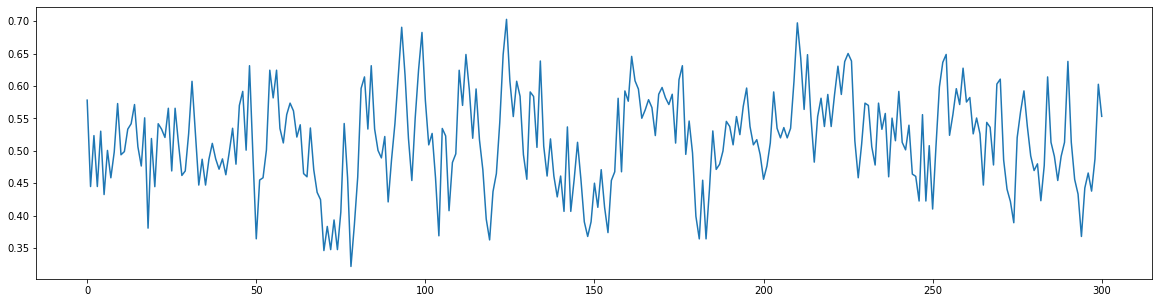

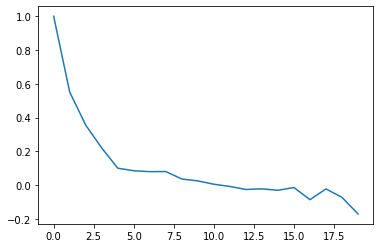

In [860]:
N=10
K=2

NK_land = np.random.rand(N, 2**(K+1))

iPosition = Position_rand(N)
numSteps=300
FitnessPath = random_walker(numSteps,initPosition = iPosition,Landscape = NK_land)

##plot the data
plt.figure(figsize=(20,5))
plt.plot(FitnessPath)
plt.show()
plt.plot(Get_AR(FitnessPath,lag_range=20))
plt.show()

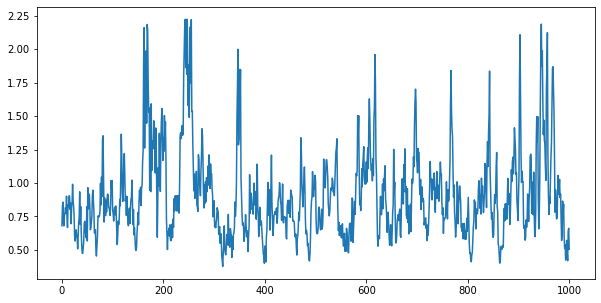

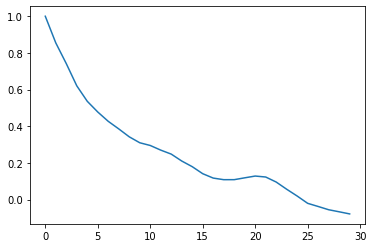

In [880]:
##Plot, may vary N and K
N=20
K=19
NK_World = (0.5+np.random.rand(N, 2*(K+1))) #add by 0.5 so it is uniform[0.5,1.5]

#set initial position
iPosition = Position_rand(N)
#set number of steps
numSteps=1000
FitnessPath = random_walker_newNK(numSteps, initPosition = iPosition,Landscape = NK_World)

##plot the data
plt.figure(figsize=(10,5))
plt.plot(FitnessPath)
plt.show()
plt.plot(Get_AR(FitnessPath,lag_range=30))
plt.show()

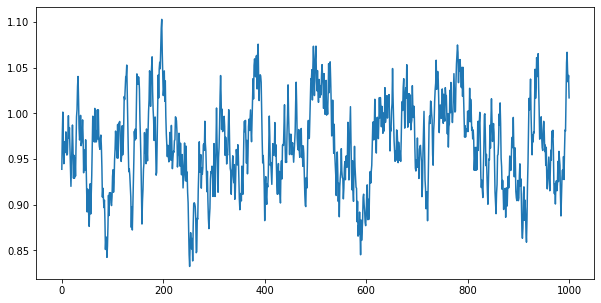

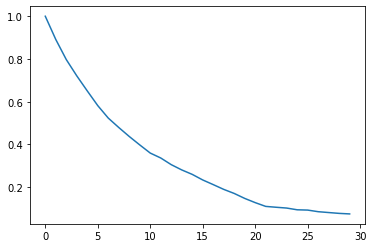

In [881]:
##Plot, may vary N and K
N=20
K=0
NK_World = (0.5+np.random.rand(N, 2*(K+1))) #add by 0.5 so it is uniform[0.5,1.5]

#set initial position
iPosition = Position_rand(N)
#set number of steps
numSteps=1000
FitnessPath = random_walker_newNK(numSteps, initPosition = iPosition,Landscape = NK_World)

##plot the data
plt.figure(figsize=(10,5))
plt.plot(FitnessPath)
plt.show()
plt.plot(Get_AR(FitnessPath,lag_range=30))
plt.show()

In [ ]:
#### Code up epistatic variance

In [1092]:
def Eptistatis_Variance_NewNK(Landscape,Samples):
    N=int(len(Landscape))
    #Sample many random points on the landscape and store the fitnesses
    SamplingFrame = [Position_rand(N) for x in range(Samples)]
    Fitnesses = [get_fitness_Product_World(Landscape,X) for X in SamplingFrame]
    MeanFitness=sum(Fitnesses)/len(Fitnesses)

    ##convert to pandas dataframe
    SamplingFrame=pd.DataFrame(SamplingFrame)
    
    
    ##Now get the alleles' excess values
    #first initialize a matrix to store the values
    ExcessAlleleValue=pd.DataFrame(np.zeros([N, 2])*np.nan)
    ##loop over the alleles
    for a in range(N):
        #print(a)
        ##Find Matches with value 0
        AllelesMatch = SamplingFrame[SamplingFrame.loc[:,a]==0]
        #get the excess allele value and store it
        ExcessAlleleValue.iloc[a,0] = AllelesMatch.apply(lambda row : get_fitness_Product_World(Landscape,row), axis = 1).mean()-MeanFitness
        
        ##Repeat for when allele matches to one
        AllelesMatch = SamplingFrame[SamplingFrame.loc[:,a]==1]
        #get the excess allele value and store it
        ExcessAlleleValue.iloc[a,1] = AllelesMatch.apply(lambda row : get_fitness_Product_World(Landscape,row), axis = 1).mean()-MeanFitness
        
    #Now calculate the  Geneic Value for a string as the sum of mean fitness and excess allele value
    #Get the corresponding values by taking the diagonal of this matrix,
    #as along the diagonal will be the corresponding value, then sum to get genic value
    ExcessGenicValues = SamplingFrame.apply(lambda row : np.diag(ExcessAlleleValue.iloc[:,row]).sum(), axis = 1)

    ##get the genic Value of a string by adding the average fitness
    GenicValues = MeanFitness + ExcessGenicValues

    ##Get Epistatis value (essentially the error term)
    EpistatisValues =  Fitnesses - GenicValues

    ##finally get the epistasis variance
    EpistasisVariance = sum(EpistatisValues**2)/len(EpistatisValues)

    return(EpistasisVariance)


#Fitnesses = [get_fitness_Product_Wor
        

In [1093]:
##Plot, may vary N and K
N=10
K=0
NK_World = (0.5+np.random.rand(N, 2*(K+1))) #add by 0.5 so it is uniform[0.5,1.5]

##take square root to get standard deviation
Eptistatis_Variance_NewNK(NK_World,100)**.5

0.018734190988563798

In [1094]:
#### Do again but for the regular nk landscape (change fitness functions)
def Eptistatis_Variance_OldNK(Landscape,Samples):
    N=int(len(Landscape))
    #Sample many random points on the landscape and store the fitnesses
    SamplingFrame = [Position_rand(N) for x in range(Samples)]
    Fitnesses = [get_fitness(Landscape,X) for X in SamplingFrame]
    MeanFitness=sum(Fitnesses)/len(Fitnesses)

    ##convert to pandas dataframe
    SamplingFrame=pd.DataFrame(SamplingFrame)
    
    
    ##Now get the alleles' excess values
    #first initialize a matrix to store the values
    ExcessAlleleValue=pd.DataFrame(np.zeros([N, 2])*np.nan)
    ##loop over the alleles
    for a in range(N):
        #print(a)
        ##Find Matches with value 0
        AllelesMatch = SamplingFrame[SamplingFrame.loc[:,a]==0]
        #get the excess allele value and store it
        ExcessAlleleValue.iloc[a,0] = AllelesMatch.apply(lambda row : get_fitness(Landscape,row), axis = 1).mean()-MeanFitness
        
        ##Repeat for when allele matches to one
        AllelesMatch = SamplingFrame[SamplingFrame.loc[:,a]==1]
        #get the excess allele value and store it
        ExcessAlleleValue.iloc[a,1] = AllelesMatch.apply(lambda row : get_fitness(Landscape,row), axis = 1).mean()-MeanFitness
        
    #Now calculate the  Geneic Value for a string as the sum of mean fitness and excess allele value
    #Get the corresponding values by taking the diagonal of this matrix,
    #as along the diagonal will be the corresponding value, then sum to get genic value
    ExcessGenicValues = SamplingFrame.apply(lambda row : np.diag(ExcessAlleleValue.iloc[:,row]).sum(), axis = 1)

    ##get the genic Value of a string by adding the average fitness
    GenicValues = MeanFitness + ExcessGenicValues

    ##Get Epistatis value (essentially the error term)
    EpistatisValues =  Fitnesses - GenicValues

    ##finally get the epistasis variance
    EpistasisVariance = sum(EpistatisValues**2)/len(EpistatisValues)

    return(EpistasisVariance)


#Fitnesses = [get_fitness_Product_Wor
        

In [1101]:
##Get epistasis variance for a regular NK landscape
N = 10
K = 9
NK_land = np.random.rand(N, 2**(K+1))+.5

##take square root to get standard deviation
Eptistatis_Variance_OldNK(NK_land,100)**.5

0.08140434039540745

0.121830367493301

0     0.195352
1     0.036533
2    -0.149832
3    -0.162899
4    -0.060763
5     0.026638
6     0.009236
7    -0.003288
8     0.131589
9    -0.053289
10   -0.223323
11    0.081718
12   -0.062930
13    0.085613
14    0.035357
15   -0.038142
16   -0.122091
17    0.248658
18   -0.095965
19    0.121830
dtype: float64

0.9969306277283237

,0,1,2
0,NaN,NaN,NaN
1,NaN,NaN,NaN
